# Ćwiczenie 41 
# Wyznaczanie przerwy energetycznej i innych parametrów złącza p  n dla Si i Ge

In [122]:
import pandas as pd
import numpy as np
import gc
import seaborn as sns
sns.set(style="darkgrid")

### Parsowanie danych 

In [123]:
df = pd.read_csv('../../data/41/41_csv.csv')

In [124]:
def convert_to_number(series,start=0):
    return series.loc[start:].replace(to_replace=r'[,]',value='.', regex=True).astype(float)

def convert_data_frame(df, coulmn_name_new_column_name):
    series = dict()
    for key in coulmn_name_new_column_name.items():
        s = df[key[0]]
        series[key[1]]=(convert_to_number(s,1))
    return pd.DataFrame(series)

In [125]:
df_si = convert_data_frame(df, {'SI':'U [V]', "Unnamed: 1": 'I [mA]', 'Unnamed: 2': 'T [C]'})
df_ge = convert_data_frame(df, {'Ge':'U [V]', "Unnamed: 4": 'I [mA]', 'Unnamed: 5': 'T [C]'})
df_task_2 = convert_data_frame(df, {'I=const=6 [mA]':'T [C]', 'Unnamed: 7': 'U_Si [V]', 'Unnamed: 8':'U_Ge [V]'})

In [134]:
df_task_2['I [mA]'] = pd.Series([0,6])

In [ ]:
li_df = [df]
del li_df
del  df
gc.collect()

## Wyznaczanie prądu wstecznego i współczynnika doskonałośc


In [147]:
df_si['ln(I)'] = np.log(df_si['I [mA]'])
df_ge['ln(I)'] = np.log(df_ge['I [mA]'])

### Wykres zależności ln(U) dla Krzemu

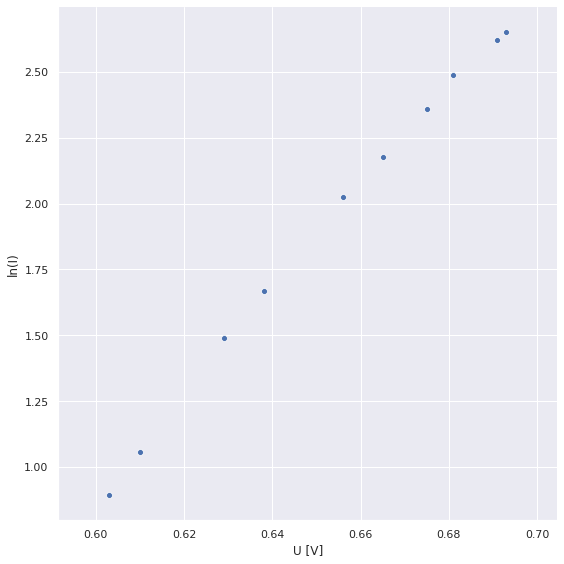

In [148]:
sns.relplot(x='U [V]', y='ln(I)',height=8, data=df_si)

### Wykres zależności ln(U) dla Germanu

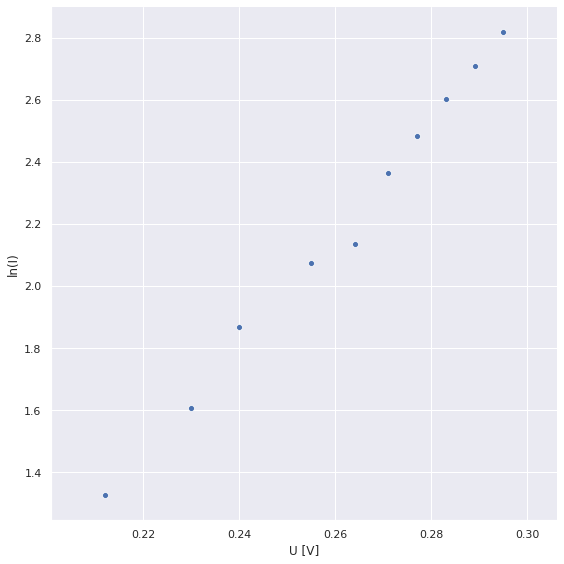

In [149]:
sns.relplot(x='U [V]', y='ln(I)',height=8, data=df_ge)

### Budowanie modelu regresji linowej 

In [ ]:
x = df_si['U [V]']
y = df_si['ln(I)']
model_si = np.poly1d(np.polyfit(x, y, 1))
x = df_ge['U [V]']
y = df_ge['ln(I)']
model_ge = np.poly1d(np.polyfit(x,y,1))
print(model_si)
print(model_ge)

### Wyznaczanie prądu wstecznego I<sub>0</sub>

In [ ]:
import math
I_0_se = math.exp(model_si.coef[1])
I_0_ge = math.exp(model_ge.coef[1])
print(f"I_0 dla krzemu: {I_0_se}")
print(f"I_0 dla germanu: {I_0_ge}")

### Wyznaczanie współczynnika doskonałości


In [ ]:
T_si = 27.3 + 273.15
T_ge = 27.3 + 273.15
k = 8.6173303 * math.pow(10, -5)
e = -1.6021766208 * math.pow(10, -19)

In [ ]:
a_si = model_si.coef[0]
coef_exc_si = e/(k*T_si*a_si)
a_ge = model_ge.coef[0]
coef_exc_ge = e/(k*T_si*a_ge)
print(f'Współczynnik dla krzemu: {coef_exc_si}')
print(f'Współczynnik dla germanu: {coef_exc_ge}')

## Wyznaczanie szerokości przerwy energetycznej E<sub>g</sub> 

In [138]:
df_task_2['T [K]'] = df_task_2['T [C]'] + 273.15
df_task_2

,T [C],U_Si [V],U_Ge [V],I [mA],T [K]
1,24.6,0.654,0.250,6.0,297.75
2,30.0,0.647,0.244,NaN,303.15
3,35.0,0.640,0.236,NaN,308.15
4,40.0,0.632,0.228,NaN,313.15
5,45.0,0.623,0.220,NaN,318.15
6,50.0,0.613,0.211,NaN,323.15
7,55.0,0.603,0.202,NaN,328.15
8,62.0,0.588,0.187,NaN,335.15
9,69.0,0.572,0.171,NaN,342.15
10,NaN,NaN,NaN,NaN,NaN


### Wykresy zależności U(T) dla Krzemu


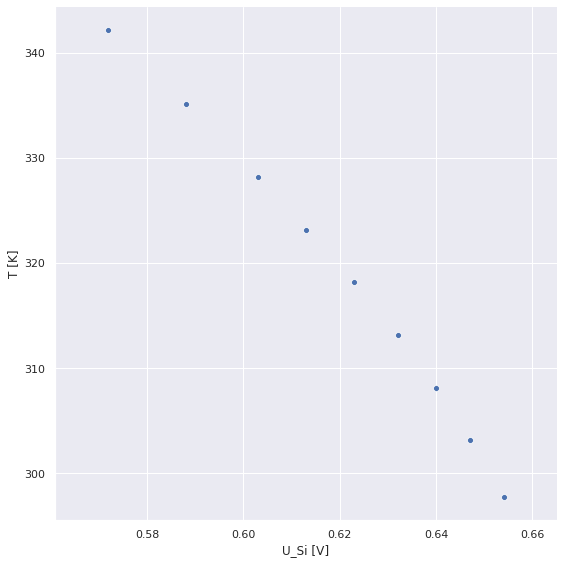

In [143]:
sns.relplot(x='U_Si [V]', y='T [K]', height=8, data=df_task_2)


### Wykresy zależności U(T) dla Germanu

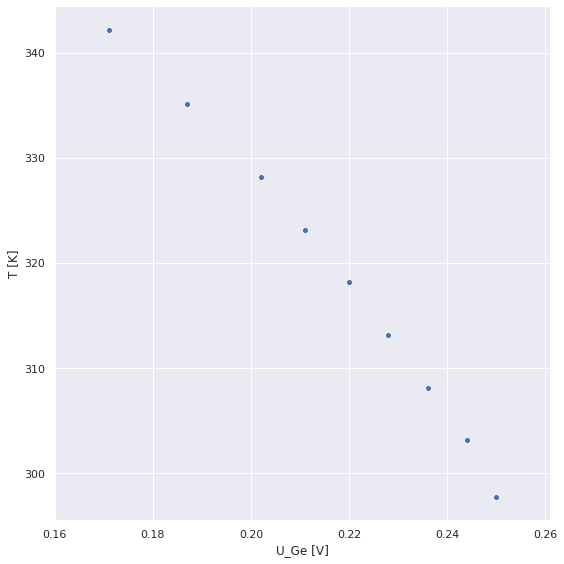

In [144]:
sns.relplot(x='U_Ge [V]', y='T [K]', height=8, data=df_task_2)

### Budowanie modelu regresji liniowej


In [150]:
x = df_task_2['T [K]'].dropna()
y =df_task_2['U_Si [V]'].dropna()
model_si_Eg = np.poly1d(np.polyfit(x,y,1))
y =df_task_2['U_Ge [V]'].dropna()
model_ge_Eg = np.poly1d(np.polyfit(x,y,1))
print('Model dla krzemu:')
print(model_si_Eg)
print('Model dla Germanu:')
print(model_ge_Eg)


Model dla krzemu:
 
-0.001857 x + 1.211
Model dla Germanu:
 
-0.001777 x + 0.7831


### Wyznaczanie przerw energtycznych E<sub>g</sub>


In [151]:
b_si = model_si_Eg.coef[1]
b_ge = model_ge_Eg.coef[1]
Eg_si = b_si * e
Eg_ge = b_ge * e
print(f"Przerwa energetyczna dla Krzemu: {Eg_si}")
print(f"Przerwa energetyczna dla Germanu: {Eg_ge}")


Przerwa energetyczna dla Krzemu: -1.9403217897783498e-19
Przerwa energetyczna dla Germanu: -1.2545866126789331e-19
